In [51]:
#importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

In [52]:
#importing the given dataset from the system
data=pd.read_csv("spam.csv",encoding="ISO-8859-1", engine="python")
#this will show the top most columns of dataset and I here given 2300 inside the braces so that it can show all the entries
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
2295,ham,HI DARLIN IM MISSIN U HOPE YOU ARE HAVING A GO...,NaN,NaN,NaN
2296,spam,<Forwarded from 21870000>Hi - this is your Mai...,NaN,NaN,NaN
2297,ham,Draw va?i dont think so:),NaN,NaN,NaN
2298,ham,Dont pick up d call when something important i...,NaN,NaN,NaN


In [53]:
#deleting the unnecessary linraries
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)
#renaming the v1 and v2 columns
data.rename(columns={'v1':'target','v2':'message'},inplace=True)
#displaying the dataset 
data

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
2295,ham,HI DARLIN IM MISSIN U HOPE YOU ARE HAVING A GO...
2296,spam,<Forwarded from 21870000>Hi - this is your Mai...
2297,ham,Draw va?i dont think so:)
2298,ham,Dont pick up d call when something important i...


In [54]:
#replacing the characters in target column with integers 0 & 1
data.replace({'target':{'ham':0,'spam':1}},inplace=True)
#displaying the dataset
data

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
2295,0,HI DARLIN IM MISSIN U HOPE YOU ARE HAVING A GO...
2296,1,<Forwarded from 21870000>Hi - this is your Mai...
2297,0,Draw va?i dont think so:)
2298,0,Dont pick up d call when something important i...


In [56]:
#this is used to calculate the length of the text or message
data['length']=data.message.apply(len)
#displaying the dataset 
data

,target,message,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
2295,0,HI DARLIN IM MISSIN U HOPE YOU ARE HAVING A GO...,125
2296,1,<Forwarded from 21870000>Hi - this is your Mai...,183
2297,0,Draw va?i dont think so:),25
2298,0,Dont pick up d call when something important i...,69


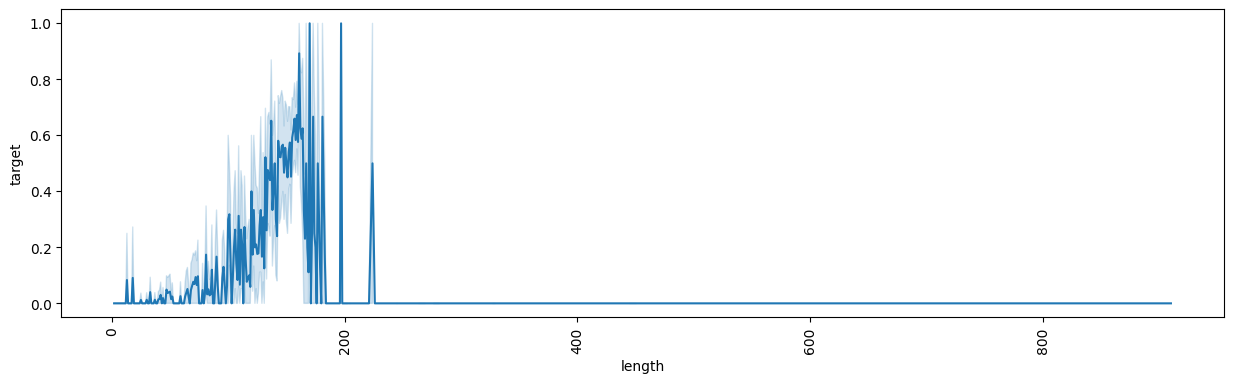

In [57]:
#Data Visualization 
plt.figure(figsize=(15,4))
sns.lineplot(data,x='length',y='target')
plt.xticks(rotation=90)
plt.show()

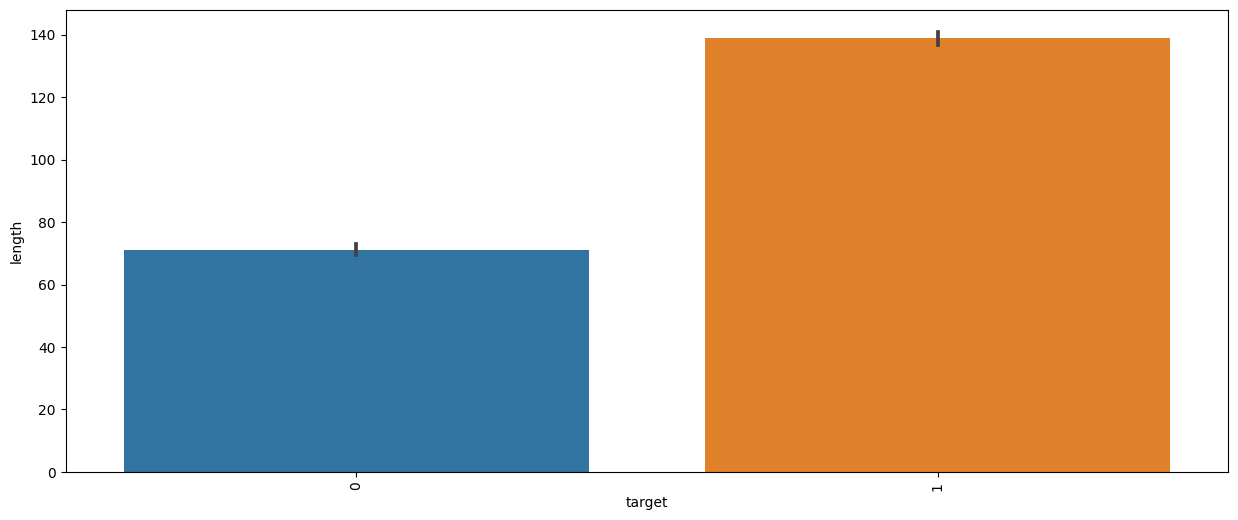

In [58]:
#Data Visualization
plt.figure(figsize=(15,6))
sns.barplot(data,x='target',y='length')
plt.xticks(rotation=90)
plt.show()

In [60]:
#splitting the Data in abscissa and ordinate
x=data['message']
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
2295    HI DARLIN IM MISSIN U HOPE YOU ARE HAVING A GO...
2296    <Forwarded from 21870000>Hi - this is your Mai...
2297                            Draw va?i dont think so:)
2298    Dont pick up d call when something important i...
2299    Congrats! 1 year special cinema pass for 2 is ...
Name: message, Length: 2300, dtype: object

In [61]:
#splitting the Data in abscissa and ordinate
y=data["target"]
y

0       0
1       0
2       1
3       0
4       0
       ..
2295    0
2296    1
2297    0
2298    0
2299    1
Name: target, Length: 2300, dtype: int64

In [62]:
#Data to be trained
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train)
print("-----------------------------------------------------------------------------------------------------")
print(y_train)

1114    No no:)this is kallis home ground.amla home to...
3589    I am in escape theatre now. . Going to watch K...
3095    We walked from my moms. Right on stagwood pass...
1012       I dunno they close oredi not... ÌÏ v ma fan...
3320                               Yo im right by yo work
                              ...                        
4931                Match started.india  &lt;#&gt;  for 2
3264    44 7732584351, Do you want a New Nokia 3510i c...
1653    I was at bugis juz now wat... But now i'm walk...
2607    :-) yeah! Lol. Luckily i didn't have a starrin...
2732    How dare you stupid. I wont tell anything to y...
Name: message, Length: 4457, dtype: object
-----------------------------------------------------------------------------------------------------
1114    0
3589    0
3095    0
1012    0
3320    0
       ..
4931    0
3264    1
1653    0
2607    0
2732    0
Name: target, Length: 4457, dtype: int64


In [63]:
cv=CountVectorizer()
trainCV=cv.fit_transform(x_train)
testCV=cv.transform(x_test)

In [64]:
#predicting the accuracy score using Support Vector Machine
classifier_svm_linear=SVC(kernel='linear')
classifier_svm_linear.fit(trainCV,y_train)
pred_svm_linear=classifier_svm_linear.predict(testCV)
Accuracy_Score_SVM_Linear=accuracy_score(y_test,pred_svm_linear)
Accuracy_Score_SVM_Linear
print("Support Vector Machine Linear=",Accuracy_Score_SVM_Linear)

Support Vector Machine Linear= 0.9811659192825112


In [65]:
#predicting the accuracy score using Decision Tree Classifier
classifier_dt=DecisionTreeClassifier()
classifier_dt.fit(trainCV,y_train)
pred_dt=classifier_dt.predict(testCV)
Accuracy_Score_dt=accuracy_score(y_test,pred_dt)
Accuracy_Score_dt
print("Decision Tree Classifier=",Accuracy_Score_dt)

Decision Tree Classifier= 0.9614349775784753
